In [42]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [43]:
risk_free_rate = 0.05
risk_premium = 0.01
initial_balance = 250000
loan_term = 30
amortization_term = 30

In [44]:
r = (risk_free_rate + risk_premium) / 12
k = 1 / (1 + r)
k0 = 1 / (1 + risk_free_rate / 12)
p = (1 - k) / (k - k ** (amortization_term * 12 + 1)) * initial_balance

In [45]:
period = range(1, loan_term * 12 + 1)
interest = []
principal = []
outstanding_balance = []
balance = initial_balance
payment_pv = 0
for i in period:
    interest.append(balance * r)
    if i == loan_term * 12 and amortization_term > loan_term:
        principal.append(balance)
    else:
        principal.append(p - interest[-1])
    balance -= principal[-1]
    outstanding_balance.append(balance)
    payment_pv += k0 ** i * (interest[-1] + principal[-1])
df = pd.DataFrame({
    'Interest': interest,
    'Principal': principal,
    'Outstanding Balance': outstanding_balance,
}, index=period)
df = df[['Interest', 'Principal', 'Outstanding Balance']]
df

,Interest,Principal,Outstanding Balance
1,"1,250.00",248.88,"249,751.12"
2,"1,248.76",250.12,"249,501.00"
3,"1,247.51",251.37,"249,249.63"
4,"1,246.25",252.63,"248,997.00"
5,"1,244.99",253.89,"248,743.11"
6,"1,243.72",255.16,"248,487.95"
7,"1,242.44",256.44,"248,231.51"
8,"1,241.16",257.72,"247,973.80"
9,"1,239.87",259.01,"247,714.79"
10,"1,238.57",260.30,"247,454.49"


In [46]:
payment_pv

279213.1033156922

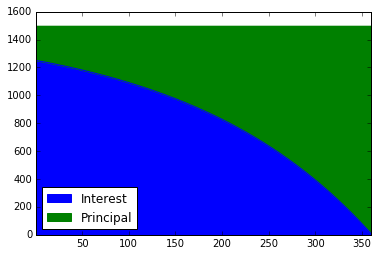

In [47]:
df = df[['Interest', 'Principal']]
df.plot.area()